# Создание ИНС в PyTorch

ИНС в `PyTorch` создаётся как лего-конструктор из отдельных блоков. Основные блоки - это слои ИНС. Различные типы слоёв для ИНС хранятся в модуле `torch.nn`.
Рассмотрим например полносвязный слой `nn.Linear()`. Для создания этого слоя надо передать как минимум два параметра:
    
    in_features - размер входных данных,
    out_features - размер данных на выходе.

Этот слой осуществляет линейное преобразование входного вектора $x$ следующим образом: 
$ y = x A^T + b$. 
Матрица $A$ имеет размер (`out_features` $\times$ `in_features`), вектор $b$ имеет длину `out_features`.

Параметры слоя - это

* веса (weights): элементы матрицы $A$,
* смещения (bias): вектор $b$.

Для созданного слоя `layer` к его весам можно обратиться командой `layer.weight`, 
к смещениям можно обратиться командой `layer.bias`. 

Иницализация параметров по умолчанию осуществляется с помощью равномерно распределённой на отрезке $[-\sqrt{k}, \sqrt{k}]$ случайной величины, где $k = \frac 1{in\_features}$.

In [1]:
import torch
from torch import nn

layer = nn.Linear(in_features = 5, out_features = 3)

print("Веса: ", layer.weight)
print("Смещения: ", layer.bias)

Веса:  Parameter containing:
tensor([[ 0.2936, -0.0264,  0.1654, -0.0535,  0.2761],
        [ 0.3725,  0.4354, -0.2121,  0.3258,  0.0892],
        [ 0.3131,  0.3160,  0.0730, -0.4465,  0.1356]], requires_grad=True)
Смещения:  Parameter containing:
tensor([-0.1293,  0.2515, -0.2632], requires_grad=True)


Также, для вывода параметров можно использовать метод `layer.parameters()`. Он вернёт некоторый специальный тип данных, но его можно привести к списку с помощью обёртки `list()`.

In [2]:
list(layer.parameters())

[Parameter containing:
 tensor([[ 0.0226, -0.4244, -0.1502, -0.3693,  0.2442],
         [ 0.0946, -0.3003, -0.1454,  0.0971,  0.2978],
         [ 0.1884, -0.0643, -0.1701, -0.0506, -0.2891]], requires_grad=True),
 Parameter containing:
 tensor([ 0.1220,  0.1168, -0.4156], requires_grad=True)]

In [3]:
layer.parameters()

<generator object Module.parameters at 0x000002B255897060>

Для того, чтобы применить слой `layer` к вектору входных данных `x`, можно использовать синтаксис
    
    `layer(x)` 
    или `layer.forward(x)`.
    
Слои принимают на вход только тензорный тип данных из `PyTorch`.

In [5]:
x = torch.rand(5)
print("Данные:", x)

y = layer.forward(x)
print("Результат:", y)

y2 = x @ layer.weight.T + layer.bias
print("Результат:", y2)

Данные: tensor([0.6633, 0.2905, 0.6216, 0.0212, 0.6110])
Результат: tensor([0.3281, 0.5547, 0.1551], grad_fn=<ViewBackward0>)
Результат: tensor([0.3281, 0.5547, 0.1551], grad_fn=<AddBackward0>)


Отметим, что слои ИНС в `PyTorch` могут принимать на вход данные сразу пакетом (англ. batch). То есть на вход слоя можно подавать матрицу размера (`batch_size` $\times$ `in_features`). Результатом будет также матрица размера (`batch_size` $\times$ `out_features`).

In [7]:
batch_size = 100
x = torch.rand(100,5)
print("Размер входных данных:", x.shape)

y = layer.forward(x)
print("Размер выходных данных:", y.shape)

Размер входных данных: torch.Size([100, 5])
Размер выходных данных: torch.Size([100, 3])


В модуле `torch.nn` хранятся также функции активации. Например, функция `nn.ReLU()`. Функции активации применяются поэлементно к входным данным. Синтаксис применения функции активации к входным данным аналогичен применению слоя к входным данным.

In [7]:
relu = nn.ReLU()
x = torch.tensor([0, -1, 1, -2, 3])
relu.forward(x)

tensor([0, 0, 1, 0, 3])

ИНС является, по сути, композицией различных отображений. В частности, классическая полносвязная ИНС - это чередование линейного слоя и нелинейной функции активации. Для создания ИНС из отдельных слоёв в `PyTorch` можно использовать несколько способов. Простейший способ - это использовать специальный модуль-контейнер `nn.Sequential()`, в котором надо просто перечислить все требуемые слои.

In [9]:
in_features = 4
out_features = 1

ann = nn.Sequential(
        nn.Linear(in_features, 8),
        nn.ReLU(),
        nn.Linear(8, 8),
        nn.ReLU(),
        nn.Linear(8, out_features)
        )

# вывод основной информации об ИНС
print(ann)

Sequential(
  (0): Linear(in_features=4, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
)


Обращаться к слоям сети можно по индексу (как к элементу массива). В частности, для получения весов первого слоя можно использовать команду `ann[0].weight`

In [14]:
ann[0].weight

Parameter containing:
tensor([[-0.4390,  0.2929, -0.4302, -0.1214],
        [-0.3085, -0.3383,  0.4258, -0.1574],
        [-0.3475,  0.2643, -0.1903, -0.0371],
        [-0.1719, -0.0998,  0.4556,  0.1096],
        [-0.2500, -0.1032, -0.0325, -0.0904],
        [ 0.3166,  0.1156,  0.3983,  0.4378],
        [ 0.1745,  0.4188,  0.4564,  0.0714],
        [ 0.1348, -0.3269, -0.0701, -0.3599]], requires_grad=True)

Второй способ создать ИНС в `PyTorch` - это создать наследник класса `nn.Module`.

In [11]:
import torch.nn.functional as F

class NNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(NNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 8)
        self.fc2 = nn.Linear(8, 8)
        self.fc3 = nn.Linear(8, output_size)
        
    def forward(self, input):
        x = self.fc1(input)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        return self.fc3(x)

ann2 = NNetwork(4,1)

Ниже примеры вычисления отклика сети на входной вектор и на пакет входных векторов.

In [13]:
x = torch.rand(in_features)
print("Данные:", x)

y = ann.forward(x)
print("Результат:", y)

y = ann2.forward(x)
print("Результат:", y)

Данные: tensor([0.5900, 0.4468, 0.5607, 0.8356])
Результат: tensor([0.2470], grad_fn=<ViewBackward0>)
Результат: tensor([0.0772], grad_fn=<ViewBackward0>)


In [15]:
batch_size = 10
x = torch.rand(batch_size,in_features)
print("Данные:", x)

y = ann.forward(x)
print("Результат:", y)

y = ann2.forward(x)
print("Результат:", y)

Данные: tensor([[0.4822, 0.5112, 0.1268, 0.5635],
        [0.2175, 0.4494, 0.1254, 0.9736],
        [0.7566, 0.9381, 0.7996, 0.4407],
        [0.1346, 0.0131, 0.0782, 0.6152],
        [0.1931, 0.2928, 0.2005, 0.9033],
        [0.9446, 0.5758, 0.0709, 0.2270],
        [0.9918, 0.9889, 0.0912, 0.1253],
        [0.6564, 0.9752, 0.7715, 0.2647],
        [0.2528, 0.5009, 0.1142, 0.5447],
        [0.0652, 0.9148, 0.2992, 0.4612]])
Результат: tensor([[0.2427],
        [0.2518],
        [0.2592],
        [0.2634],
        [0.2499],
        [0.2555],
        [0.2491],
        [0.2601],
        [0.2453],
        [0.2629]], grad_fn=<AddmmBackward0>)
Результат: tensor([[0.0823],
        [0.0883],
        [0.0714],
        [0.0344],
        [0.0686],
        [0.0875],
        [0.1114],
        [0.0685],
        [0.0743],
        [0.0892]], grad_fn=<AddmmBackward0>)


## Обучение ИНС в PyTorch

Рассмотрим некоторую ИНС. Для её обучения на некотором набор входных данных надо сравнить результат работы ИНС с истинными ответами на наборе входных данных. Чтобы оценить насколько далеки ответы ИНС от истинных, существует множество различных метрик, которые называют функциями ошибки (англ. loss functions). 

Простейшая функция ошибки - это среднеквадратичная ошибка (англ. MSE).

Пусть $X$ пакет входных данных, то есть матрица размера (`batch_size` $\times$ `in_features`), $Y$ массив выходных данных, то есть матрица размера (`batch_size` $\times$ `out_features`). Пусть $\varphi$ наша ИНС. Результат работы ИНС обозначим

$\widehat Y = \varphi(X).$

Ответы ИНС $\widehat Y$ также представляют собой матрицу размера (`batch_size` $\times$ `out_features`). Тогда среднеквадратичная ошибка имеет вид:

$$ MSE(Y,\widehat Y) = \frac{1}{batch\_size} \sum_{i=1}^{batch\_size} \left\|Y_i - \widehat Y_i \right\|^2,$$

где $Y_i, \widehat Y_i$ строки в соответствующих массивах.

В модуле `torch.nn` среднеквадратичная ошибка реализована методом `MSELoss()`.

Сформируем сеть, набор данных и найдём ошибку ИНС на данных.

In [18]:
import torch.nn.functional as F

in_features = 4
out_features = 2
batch_size = 10

ann = nn.Sequential(
        nn.Linear(in_features, 8),
        nn.ReLU(),
        nn.Linear(8, 16),
        nn.ReLU(),
        nn.Linear(16, out_features)
        )

# Создание каких-то данных
X = torch.rand(batch_size,in_features)
Y_true = torch.rand(batch_size,out_features)

Y_hat = ann(X)

loss = F.mse_loss(Y_hat, Y_true)
print(loss)

tensor(0.1524, grad_fn=<MseLossBackward0>)


Для обучения сети требуется сдвинуть параметры ИНС в сторону анти-градиента на малый шаг, размер шага контроллируется параметром `learning_rate`, называемого шагом обучения. Формула обновления параметров имеет вид:

    parameters = parameters - learning_rate * gradient
    
где `gradient` - это вектор градиента функции ошибки `loss` по параметрам ИНС, `parameters` - это вектор всех параметров ИНС.

Нахождение градиента функции ошибки по всем параметрам для текущих входных данных делаются в `PyTorch` автоматически.

При вычислении ответа ИНС на входные данные специальный модуль Autograd запоминает сделанные операции и может найти необходимые градиенты для осуществления шага градиентного спуска. Для вычисления необходимых градиентов надо у результата работы функции ошибки, то есть у переменной `loss`, вызвать метод `loss.backwards()`.

Важно также отметить, что до вызова метода `loss.backwards()` необходимо обнулять градиенты вызовом метода `ann.zero_grad()` у созданной ИНС. Если этого не делать, то значения градиентов будут накапливаться после каждого вызова метода, вычисляющего отклик ИНС.

In [20]:
# Проведём шаг вычисления градиентов
ann.zero_grad()
loss.backward()

Посмотреть на вычисленные градиенты для параметров того или иного слоя можно следующим образом:

In [22]:
ann[0].weight.grad

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 7.1120e-03,  7.4425e-03,  1.0506e-02,  1.0430e-02],
        [-1.3978e-05, -4.6000e-04, -1.4386e-04, -2.2195e-04],
        [ 1.6073e-02,  4.6198e-03,  1.9820e-02,  1.9198e-02],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 5.2665e-03,  1.8021e-03,  7.2929e-03,  7.9302e-03],
        [ 1.3832e-03,  2.0577e-03,  2.5127e-03, -7.5565e-04]])

Проведём на простом примере демонстрацию того, что градиенты действительно считаются какие нужно. И отметим также на примере, что будет, если не обнулить градиенты.

Рассмотрим полносвязный слой с 4 входами и 1 выходом:

$$ \widehat y = w_1 x_1 + ... + w_4 x_4 + b.$$

Пусть $y=0$. Тогда MSE имеет вид $$ loss = (\widehat y-0)^2.$$
Значит градиент по весам имеет вид $$grad_w (loss) = 2 \widehat y (x_1,...,x_4) .$$
Вычислим градиент вызовом метода `loss.backward()` и найдём градиент напрямую по формуле.

In [44]:
test_layer = nn.Linear(4,1)

X = torch.rand(1,4)
Y_true = torch.tensor([[0.0]])
Y_hat = test_layer(X)
Y_hat

tensor([[-0.4094]], grad_fn=<AddmmBackward0>)

In [46]:
loss = F.mse_loss(Y_hat, Y_true)
print("Функция ошибки по MSELoss():", loss)
print("Функция ошибки по формуле: ", Y_hat ** 2)

Функция ошибки по MSELoss(): tensor(0.1676, grad_fn=<MseLossBackward0>)
Функция ошибки по формуле:  tensor([[0.1676]], grad_fn=<PowBackward0>)


In [48]:
test_layer.zero_grad()
loss.backward()

print('Градиент по Autograd:', test_layer.weight.grad)
print('Градиент по формуле:', X * Y_hat * 2)

Градиент по Autograd: tensor([[-0.5526, -0.7388, -0.6683, -0.2585]])
Градиент по формуле: tensor([[-0.5526, -0.7388, -0.6683, -0.2585]], grad_fn=<MulBackward0>)


Далее, запомним градиент и найдём loss для новых входных данных.
И вычислим градиенты по Autograd без их обнуления. Получим сумму градиентов по новым и старым данным.

In [50]:
# Получение старых градиентов, перевод в NumPy и копирование значений
old_grads = test_layer.weight.grad.numpy().copy()

X = torch.rand(1,4)
Y_true = torch.tensor([[0.0]])
Y_hat = test_layer(X)

loss = F.mse_loss(Y_hat, Y_true)
print(loss)

tensor(0.0059, grad_fn=<MseLossBackward0>)


In [52]:
loss.backward()

print('Градиент по Autograd:', test_layer.weight.grad)
print('Градиент по формуле:', X * Y_hat * 2)

Градиент по Autograd: tensor([[-0.6194, -0.7771, -0.6741, -0.2612]])
Градиент по формуле: tensor([[-0.0668, -0.0383, -0.0058, -0.0027]], grad_fn=<MulBackward0>)


In [54]:
print('Сумма градиентов по старым и новым данным:', torch.tensor(old_grads) + X * Y_hat * 2)

Сумма градиентов по старым и новым данным: tensor([[-0.6194, -0.7771, -0.6741, -0.2612]], grad_fn=<AddBackward0>)


Действительно, градиент, вычисленный с помощью Autograd является суммой градиентов от двух векторов данных.

Далее, требуется сделать шаг градиентного спуска. 
Один шаг метода можно сделать непосредственным образом, реализовав формулу: 

    parameters = parameters - learning_rate * gradient

In [56]:
test_layer = nn.Linear(4,1)

X = torch.rand(1,4)
Y_true = torch.tensor([[0.0]])
Y_hat = test_layer(X)

loss = F.mse_loss(Y_hat, Y_true)
test_layer.zero_grad()
loss.backward()

In [58]:
learning_rate = 1.0
for layer_params in test_layer.parameters():
    print('Параметры слоя:', layer_params.data)
    print('Градиент по параметрам слоя:', layer_params.grad.data)
    print('Обновлённые параметры:', layer_params.data - learning_rate * layer_params.grad.data, '\n')

Параметры слоя: tensor([[ 0.4394, -0.2187,  0.4545,  0.1989]])
Градиент по параметрам слоя: tensor([[1.3795, 1.6776, 2.1077, 1.6882]])
Обновлённые параметры: tensor([[-0.9401, -1.8964, -1.6532, -1.4894]]) 

Параметры слоя: tensor([0.4726])
Градиент по параметрам слоя: tensor([2.2862])
Обновлённые параметры: tensor([-1.8135]) 



В данном случае слой один, и мы провели обновления для весов и смещений.

Сущестует множество различных модификаций метода градиентного спуска. В `PyTorch` многие методы реализованы, их называют оптимизаторами и они хранятся в модуле `torch.optim`. Классический градиентный спуск - это метод `torch.optim.SGD()`. 

Сравним результат работы оптимизатора и результат обновления весов в ручную.
Сначала приведём код для обновления вручную.

In [60]:
# Фиксируем набор данных
X = torch.rand(1,4)
Y_true = torch.tensor([[0.0]])

In [62]:
# создаём сеть с заданными параметрами
test_layer = nn.Linear(4,1)

test_layer.weight.data = torch.tensor([[0.1, -0.2,  0.3, -0.4]])
test_layer.bias.data = torch.tensor([[1.0]])

print('Начальные параметры слоя:', list(test_layer.parameters()))

Начальные параметры слоя: [Parameter containing:
tensor([[ 0.1000, -0.2000,  0.3000, -0.4000]], requires_grad=True), Parameter containing:
tensor([[1.]], requires_grad=True)]


In [64]:
# найти функцию ошибку на данных
Y_hat = test_layer(X)
loss = F.mse_loss(Y_hat, Y_true)

# обнулить и вычислить градиенты для параметров
test_layer.zero_grad()
loss.backward()

# шаг градиентного спуска, реализованный вручную
learning_rate = 1.0
for layer_params in test_layer.parameters():
    layer_params.data = layer_params.data - learning_rate * layer_params.grad.data
    #Тоже самое с вычисление in-place
    #layer_params.data.sub_(layer_params.grad.data * learning_rate)
    
print('Обновлённые параметры слоя:', list(test_layer.parameters()))

Обновлённые параметры слоя: [Parameter containing:
tensor([[-1.7129, -1.1530, -1.9437, -1.2150]], requires_grad=True), Parameter containing:
tensor([[-1.2944]], requires_grad=True)]


Теперь создадим аналогичный слой и обновим параметры с помощью оптимизатора.

In [66]:
import torch.optim as optim

test_layer2 = nn.Linear(4,1)

test_layer2.weight.data = torch.tensor([[0.1, -0.2,  0.3, -0.4]])
test_layer2.bias.data = torch.tensor([[1.0]])

print('Начальные параметры слоя:', list(test_layer2.parameters()))

Начальные параметры слоя: [Parameter containing:
tensor([[ 0.1000, -0.2000,  0.3000, -0.4000]], requires_grad=True), Parameter containing:
tensor([[1.]], requires_grad=True)]


In [68]:
# создать экземпляр оптимизатора для нашей сети
optimizer = optim.SGD(test_layer2.parameters(), lr=1.0)

# найти функцию ошибку на данных
Y_hat = test_layer2(X)
loss = F.mse_loss(Y_hat, Y_true)
print(loss)

# обнулить и вычислить градиенты для параметров
test_layer2.zero_grad()
# можно также писать optimizer.zero_grad()
loss.backward()

# шаг градиентного спуска
optimizer.step()    

print('Обновлённые параметры слоя:', list(test_layer2.parameters()))

tensor(1.3161, grad_fn=<MseLossBackward0>)
Обновлённые параметры слоя: [Parameter containing:
tensor([[-1.7129, -1.1530, -1.9437, -1.2150]], requires_grad=True), Parameter containing:
tensor([[-1.2944]], requires_grad=True)]


Как ясно из примеров, обновлённые параметры для двух способов вычисления совпадают.

## Итоговый код для обучения ИНС

Приведём общий код для обучения ИНС.

In [70]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Генерация данных для обучения
X_train= torch.rand(1000,7)
Y_train = torch.rand(1000,1)
 
# Создание ИНС
model = nn.Sequential(
    nn.Linear(7, 12),
    nn.ReLU(),
    nn.Linear(12, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
)
print(model)
 
# Задание оптимизатора
optimizer = optim.SGD(model.parameters(), lr=0.0001)
 
# Число эпох обучения и размер батча для обучения ИНС
n_epochs = 100
batch_size = 10

all_errors = []

# обучение
for epoch in range(n_epochs):
    for i in range(0, len(X_train), batch_size):
        # формирование предсказаний модели
        X_batch = X_train[i:i+batch_size]
        Y_pred = model(X_batch)
        Y_batch = Y_train[i:i+batch_size]
        # вычисление ошибки
        loss = F.mse_loss(Y_pred, Y_batch)
        all_errors.append(loss.data.numpy())
        # обнуление градиентов и их вычисление
        model.zero_grad()
        loss.backward()
        # шаг градиентного спуска
        optimizer.step()
        
#Итоговая ошибка
Y_pred = model(X_train)
loss = F.mse_loss(Y_pred, Y_train)
print(f"Значение ошибки {loss}")


Sequential(
  (0): Linear(in_features=7, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
)
Значение ошибки 0.0821336954832077


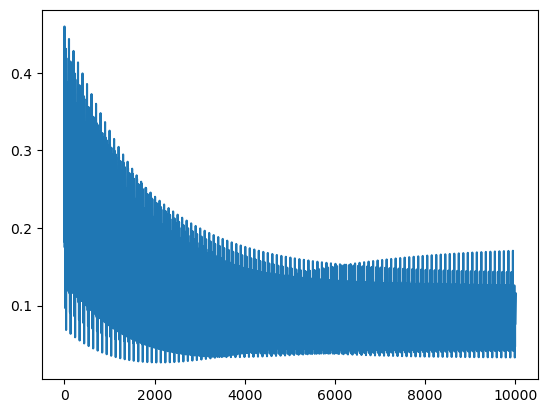

In [71]:
# для того, чтобы избежать ошибок при построении графиков
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import matplotlib.pyplot as plt
plt.plot(all_errors)

### Ещё одна особенность

При DQN с буфером памяти взаимодействие со средой и обучение ИНС два разных процесса. В ходе взаимодействия надо будет вычислять значения Q-функции с помощью ИНС, чтобы выбрать следующее действие. В PyTorch по умолчанию вычисление каждого отклика ИНС сопровождается нахождением сооветствующих градиентов. При выборе действия нам это вычисление градиентов не требуется. Чтобы указать это, используется следующие синтаксис

In [ ]:
# вычисляем отклик ИНС без обучения
with torch.no_grad():
    q_values = model(state)

Строка `torch.no_grad()` указывает PyTorch, что при вычислениях с такой обёрткой можно не следить за градиентами. 
Кроме того, для улучшения сходимости ИНС используются такие дополнительные методы для отдельных слоёв, как Dropout, BatchNormalization. Эти методы ведут себя по-разному при обучении сети и при просто вычислении отклика.
Чтобы перевести ИНС в состояние только для вычисления отклика используется синтаксис
`model.eval()`. 
Обратно вернуть сеть в состояние для обучения можно строкой `model.train()`. 

In [ ]:
# вычисляем отклик ИНС без обучения, без Dropout, BatchNormalization.
model.eval()  
with torch.no_grad():
    q_values = model(state)
model.train()

### Получение вектора вероятностей на выходе ИНС

Ряд методов, изучаемых далее, основан на построении стратегии, то есть функции $\pi(a|s)$. Эта функция будет приближаться ИНС, на вход она принимает состояния, а на выходе выдает вектор вероятностей. В `PyTorch` удобно вместо вектора вероятностей $(\pi(a_1|s),...,\pi(a_n|s))$ возвращать специальный класс, который реализует категориальное распределение.

Итак, пусть ИНС возвращает после последнего слоя вектор значений. Для перевода этого вектора в вектор вероятностей (такой что большим значениям соответствуют большие вероятности, а меньшим значениям - меньшие вероятности) к последнему слою ИНС применим функцию активации в виде softmax().

In [5]:
import torch
import torch.nn.functional as F

x = torch.Tensor([[1, -2, 3],[-5,-10,2]])
# примение softmax() к строкам (вдоль последней размерности)
x = F.softmax(x, dim=-1)
x

tensor([[1.1850e-01, 5.8998e-03, 8.7560e-01],
        [9.1105e-04, 6.1386e-06, 9.9908e-01]])

По полученному после softmax() вектору вероятностей надо создать экземпляр класс `Categorical`, он и будет реализацией категориального распределения. Чтобы сделать выборку по этому распределению можно использовать метод `Categorical.sample()`.

In [11]:
type(prob_distribution)

torch.distributions.categorical.Categorical

In [13]:
from torch.distributions import Categorical

x = torch.Tensor([1, -2, 3])
print("Вектор вероятностей:", F.softmax(x, dim=-1))
prob_distribution = Categorical(F.softmax(x, dim=-1))
for i in range(10):
    print(prob_distribution.sample())

Вектор вероятностей: tensor([0.1185, 0.0059, 0.8756])
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(2)
tensor(0)
tensor(2)
tensor(2)
tensor(2)


Чтобы из созданного экземпляра класса `Categorical` получить вектор вероятностей, можно использовать команду:

    prob_distribution.probs

Для получения вектора логарифмов вероятностей надо использовать команду:

    prob_distribution.logits

Более того, дальнейшие методы потребуют по сделанной выборке из распределения `prob_distribution` определить соответствующие логарифм вероятности. Для этого можно использовать команду 

    prob_distribution.log_prob(prob_distribution.sample())

In [16]:
print("Вероятности:", prob_distribution.probs)
print("Лог-вероятности:", prob_distribution.logits)
sample = prob_distribution.sample()
print("Выборка:", sample)
print("Лог-вероятность по сделанной выборке:", prob_distribution.log_prob(sample))

Вероятности: tensor([0.1185, 0.0059, 0.8756])
Лог-вероятности: tensor([-2.1328, -5.1328, -0.1328])
Выборка: tensor(2)
Лог-вероятность по сделанной выборке: tensor(-0.1328)


Удобство этого синтаксиса в том, что лог-вероятности будут участвовать в формировании функции ошибки. И так как эти лог-вероятности получены из ИНС, по ним будут формироваться градиенты для обучения ИНС. Несмотря на что выход ИНС - это экземпляр класса `Categorical`, алгоритмы `PyTorch` реализованы так, что все требуемые вычисления будут корректно выполнены.

    Прочие оптимизаторы: Adam, RMSProp

    Попробовать AdamW